- Neste projeto, desenvolvemos um modelo de regressão linear para prever a área irrigada por ângulo com base nas horas de irrigação.

Foi usado na Etapa de EDA:

Gráfico de dispersão

Análise visual da relação entre variáveis

Observação da linearidade perfeita

- A relação perfeitamente linear sugere que uma regressão simples será altamente eficaz

Na Etapa de Modelagem da regressão linear simples, analisamos:

A equação da reta

As métricas (MAE, MSE)

A dispersão das previsões vs realidade

A análise de resíduos

- Criamos um modelo simples, mas com altíssimo desempenho, pois os dados seguem uma relação perfeitamente linear

Conclusão Estratégica: 

O modelo é altamente preciso nos dados simulados e oferece uma base confiável para estimar cobertura de irrigação por tempo. No entanto, sua performance em campo pode variar com ruídos não modelados.

### Importando Bibliotecas

In [84]:
# EDA, Visualização e Carga dos dados
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

# Teste Estatísticos
import scipy.stats as stats

# Criação do Modelo e Avaliação de Métricas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


### Carregando os dados

In [85]:
df_irrigação = pd.read_csv('dados_de_irrigacao.csv')

In [86]:
# Analisando Estrutura
df_irrigação.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Horas de Irrigação        299 non-null    int64  
 1   Área Irrigada             299 non-null    int64  
 2   Área Irrigada por Ângulo  299 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 7.1 KB


In [87]:
# Visualizando DataFrame
df_irrigação.head(10)

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
0,1,100,66.666667
1,2,200,133.333333
2,3,300,200.000000
3,4,400,266.666667
4,5,500,333.333333
5,6,600,400.000000
6,7,700,466.666667
7,8,800,533.333333
8,9,900,600.000000
9,10,1000,666.666667


### EDA

In [88]:
# Análise Descritiva
round(df_irrigação.describe(), 2)

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
count,299.00,299.00,299.00
mean,150.00,15000.00,10000.00
std,86.46,8645.81,5763.87
min,1.00,100.00,66.67
25%,75.50,7550.00,5033.33
50%,150.00,15000.00,10000.00
75%,224.50,22450.00,14966.67
max,299.00,29900.00,19933.33


- Observando a análise descritiva temos a informação prévia sobre a distribuição dos dados, aparentemente temos um dataset sem outliers, vamos aos graficos de Distribuição

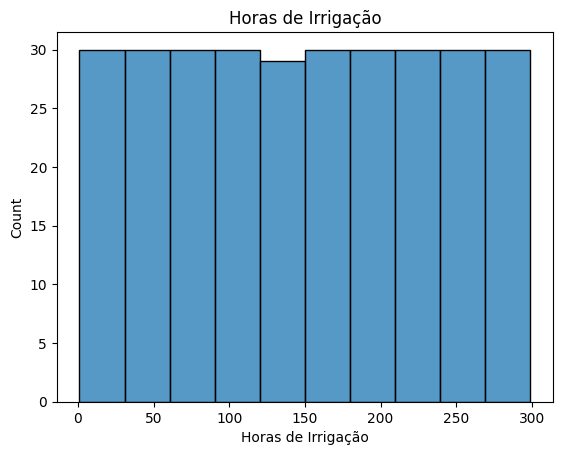

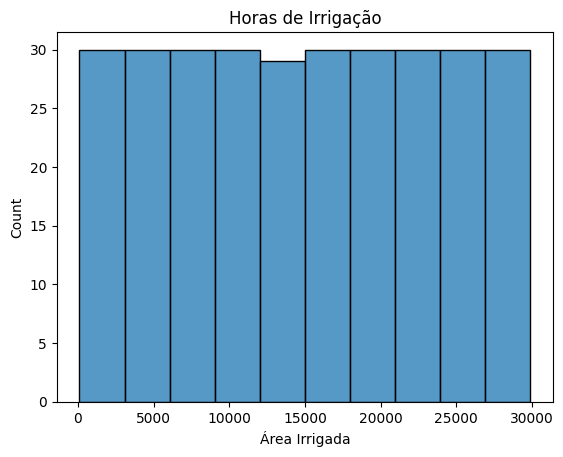

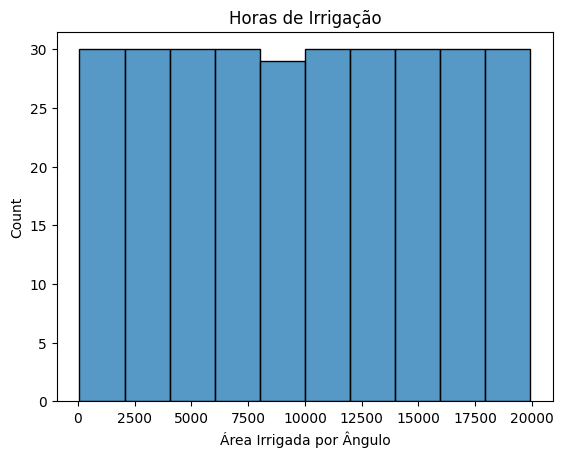

In [89]:
# Distribuição de Cada variável
for col in df_irrigação.columns:
    sns.histplot(df_irrigação[col])
    plt.title('Horas de Irrigação')
    plt.show()

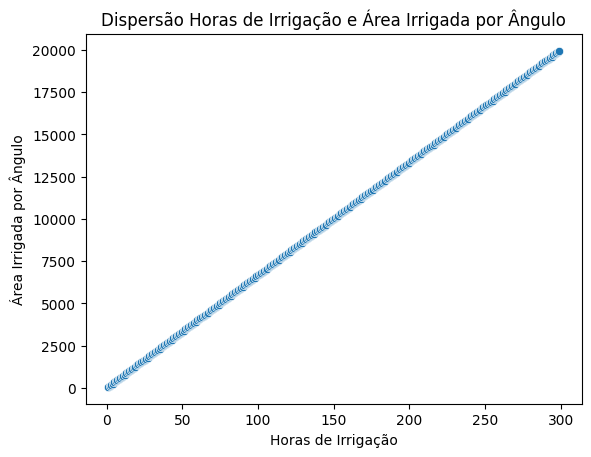

In [90]:
# Distribuição entre Horas de Irrigação e Área Irrigada por Ângulo
sns.scatterplot(df_irrigação, x='Horas de Irrigação', y='Área Irrigada por Ângulo')
plt.title('Dispersão Horas de Irrigação e Área Irrigada por Ângulo')
plt.show()

- Como esperado, ao Plotar os gráficos, pode ser observado uma regressão linear perfeita, ou seja, conforme aumentam as horas de irrigação, a área irrigada por ângulo aumenta de forma linear e proporcional

- Com este grafico consigo identificas se há ruidos e Outliers. Não é o caso deste dataset

- Nota-se também uma correlação quase perfeita, vamos examinar outras métricas de correlação

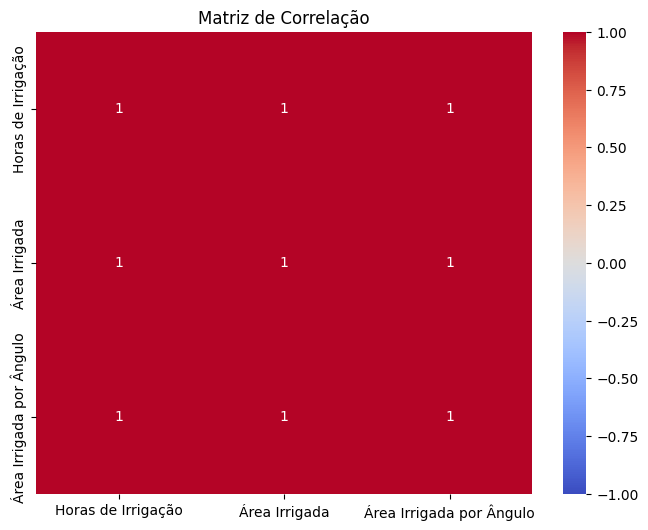

In [91]:
# Gráfico de Correlação
corr = df_irrigação.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,
            vmin=-1,
            vmax=1,
            annot=True,
            cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

- Agora temos uma confirmação de que as variáveis estão autamente correlacionadas

- Vamos Criar o Modelo de Regressão Linear

### Preparação dos Conjuntos de Dados e Treinamento do Modelo

In [92]:
# Separar X e y
X = df_irrigação[['Horas de Irrigação']]
y = df_irrigação['Área Irrigada por Ângulo']

In [93]:
# Separar conjunto de Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [94]:
# Treinar o Modelo
model_rg_irrigacao = LinearRegression()
model_rg_irrigacao.fit(X_train, y_train)

LinearRegression()

In [95]:
# Equação da reta
print(f'Equação da Reta: Y = {model_rg_irrigacao.intercept_:.2f} + {model_rg_irrigacao.coef_[0]:.2f} * X')

Equação da Reta: Y = -0.00 + 66.67 * X


### Avaliando o Modelo

In [96]:
# Fazendo predições
y_pred = model_rg_irrigacao.predict(X_test)

In [97]:
# Calculando Métricas
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)

# Analisando as Métricas Calculadas
print(f'Mean Absolute Error: {mae:.2f}\nMean Squared Error: {mse:.2f}')

Mean Absolute Error: 0.00
Mean Squared Error: 0.00


- As métricas de avaliação do modelo mostram um resultado de zero resíduos ao prever novos dados em relação ao conjunto de teste

- Vamos analisar em um gráfico

In [98]:
# Confirmação visual e estatística
residuos = y_pred - y_test
residuos

251    0.000000e+00
65    -2.728484e-12
202    0.000000e+00
130   -1.818989e-12
201    0.000000e+00
           ...     
85    -1.818989e-12
279    0.000000e+00
71    -1.818989e-12
226    0.000000e+00
186    0.000000e+00
Name: Área Irrigada por Ângulo, Length: 90, dtype: float64

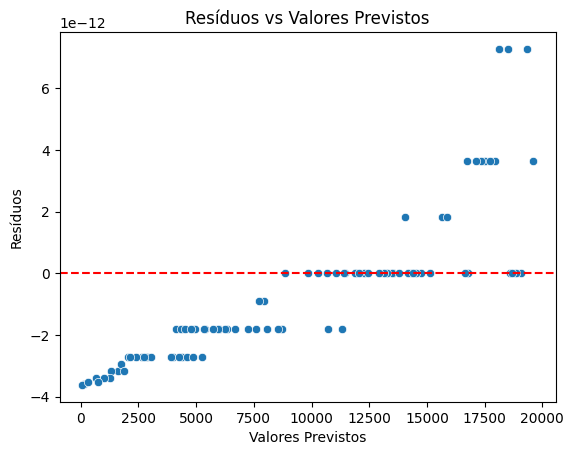

In [99]:
# Gráfico dos resíduos
sns.scatterplot(x=y_pred, y=residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Valores Previstos')
plt.show()

#### Predições de Exemplo


In [103]:
horas = 15
predict = model_rg_irrigacao.predict([[horas]])

print(f'Para {horas} horas de irrigação, a área irrigada prevista é de {predict[0]:.2f}m²')

Para 15 horas de irrigação, a área irrigada prevista é de 1000.00m²


c:\Users\Carolina\.virtualenvs\ROCKETSEAT-znLm4meT\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

